In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/new

/content/drive/MyDrive/new


In [1]:
!pip install pandas
!pip install numpy
!pip install tensorflow

^C


NameError: name 'tensorflow' is not defined

In [1]:
!pip install numpy==1.25.2
!pip install mealpy==2.5.1

  Using cached mealpy-2.5.1-py3-none-any.whl.metadata (77 kB)
  Using cached opfunu-1.0.4-py3-none-any.whl.metadata (10 kB)
Using cached mealpy-2.5.1-py3-none-any.whl (383 kB)
Using cached opfunu-1.0.4-py3-none-any.whl (13.0 MB)


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
print("All Libraries imported")

All Libraries imported


In [ ]:
tensorflow.__version__

In [7]:
# Add new imports for CLPSO
# !pip install --upgrade --force-reinstall mealpy==2.5.1
from mealpy.swarm_based.PSO import CL_PSO

In [8]:
#Dataset Downloaded
#https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset/data

In [9]:
# Step 1: Load and Clean Data
print("Step 1: Loading and Cleaning Data")
df = pd.read_csv("newdataset.csv")
print("Initial shape:", df.shape)

Step 1: Loading and Cleaning Data
Initial shape: (768, 10)


In [ ]:
df.head()

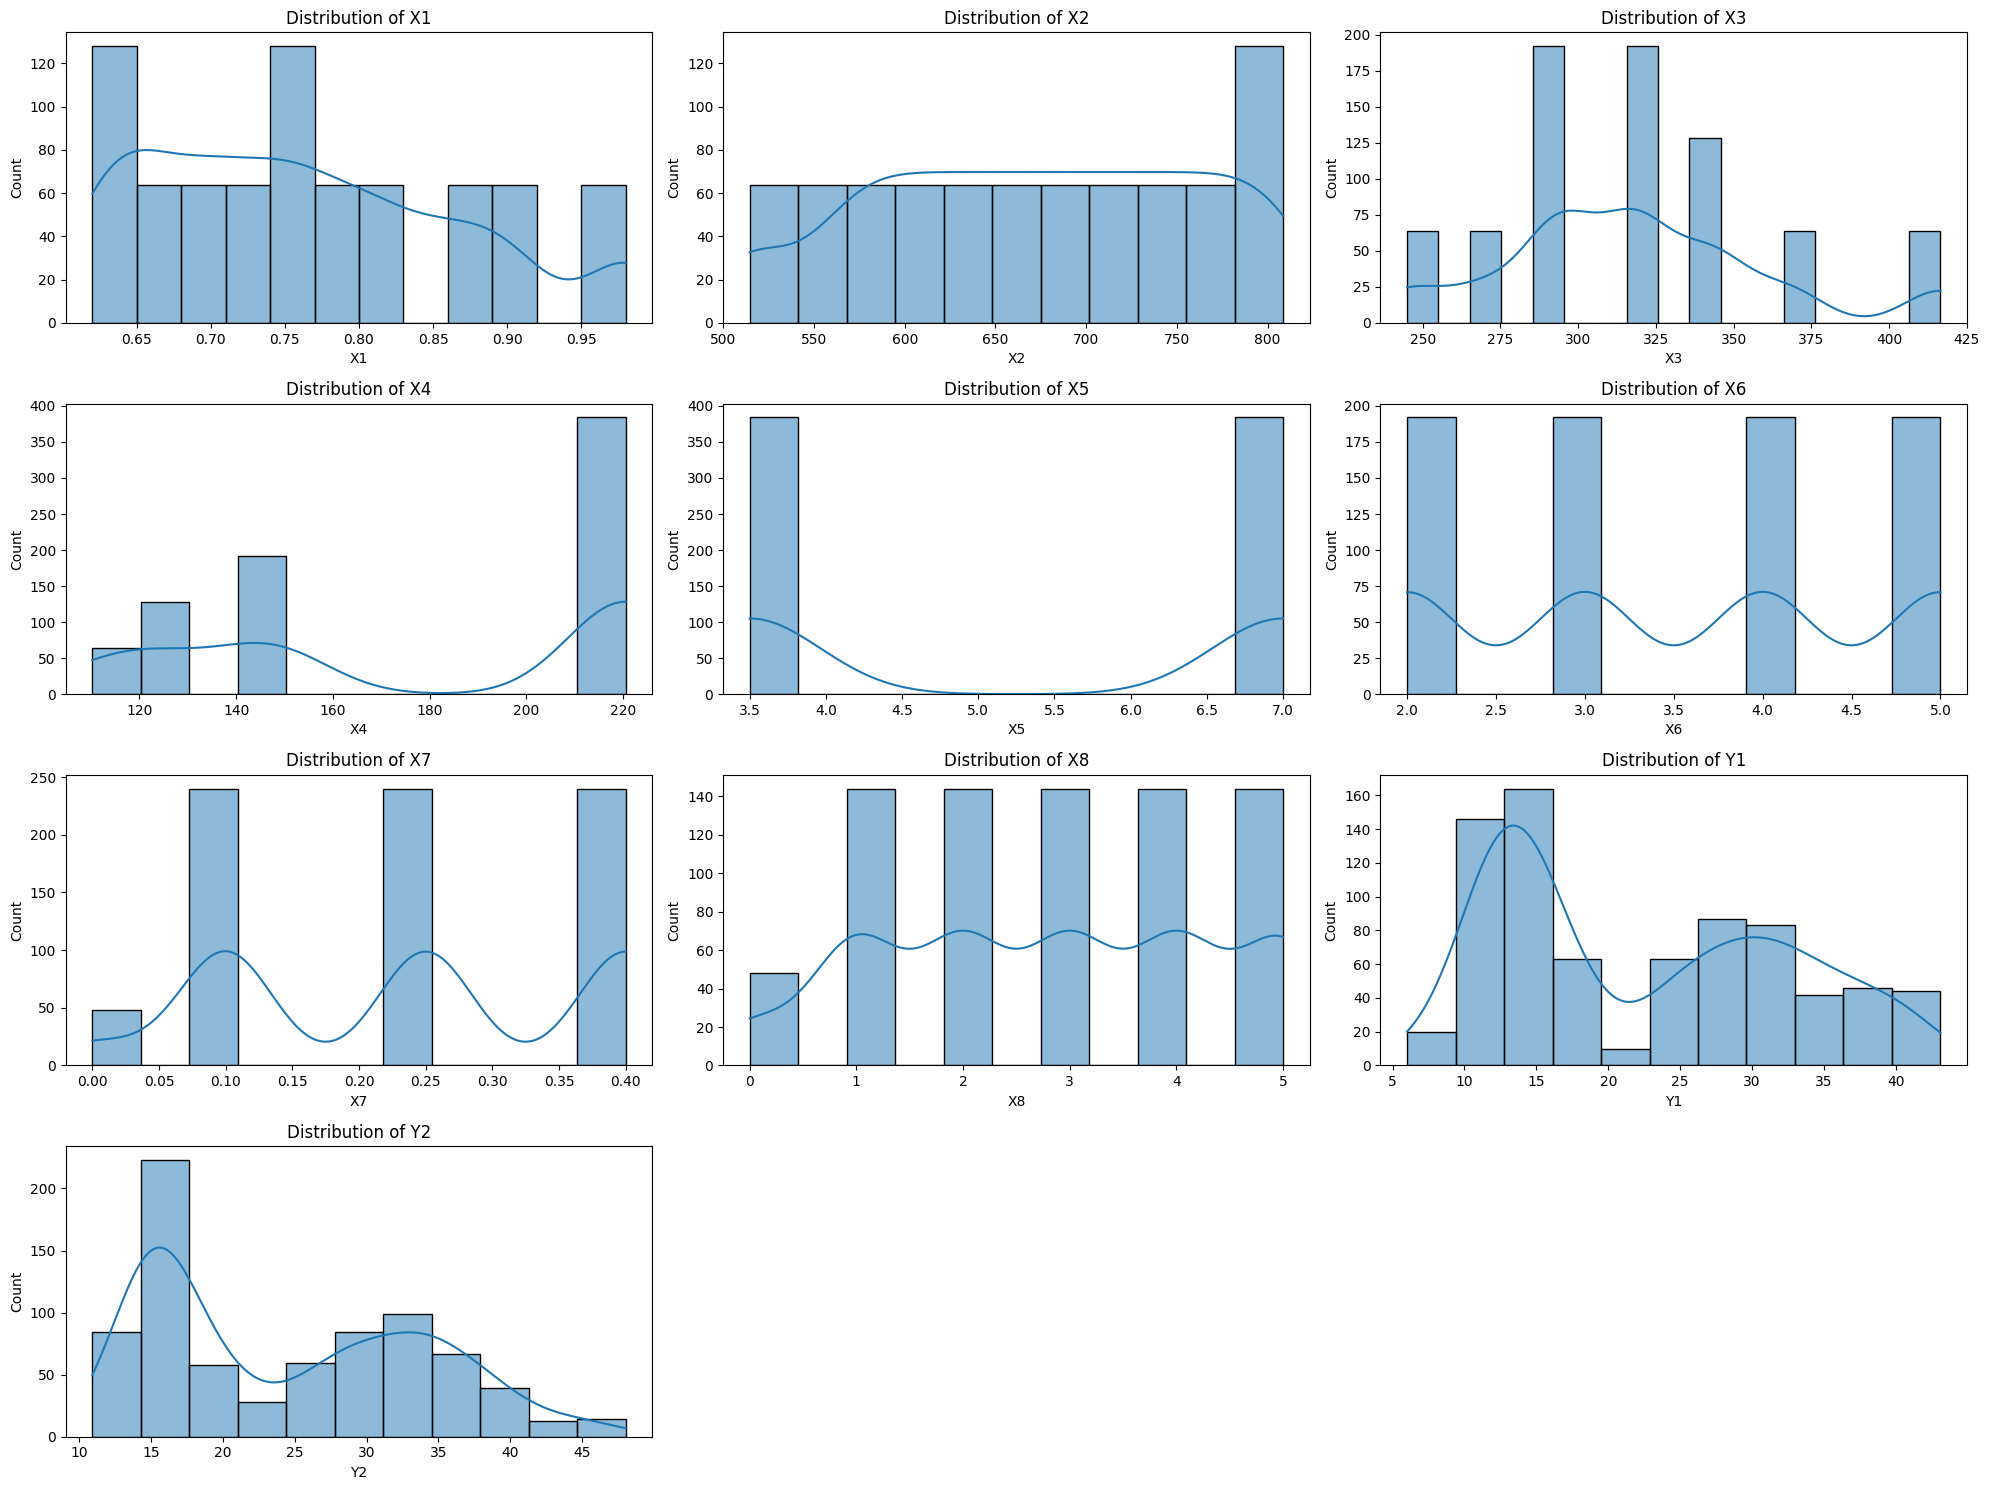

In [10]:
# Visualize distribution of features before cleaning
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

##Data Cleaning

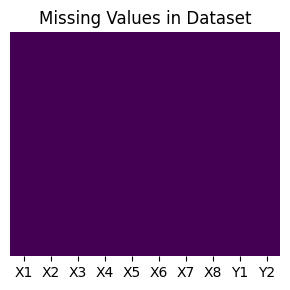


Missing values count:
[0 0 0 0 0 0 0 0 0 0]


In [11]:
# Visualize missing values
plt.figure(figsize=(3, 3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.tight_layout()
plt.show()
#Data Imputation
print("\nMissing values count:")
print(np.array(df.isnull().sum()).flatten())

In [12]:
# Check for infinite values
inf_count = np.isinf(df).sum()
print("\nInfinite values count:")
print(np.array(inf_count).flatten())

# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"\nRemoved {duplicates} duplicate rows")


Infinite values count:
[0 0 0 0 0 0 0 0 0 0]

Removed 0 duplicate rows


In [13]:
# Remove infinite values
df = df.replace([np.inf, -np.inf], np.nan)

# Impute missing values with median
df = df.fillna(df.median())

print("Shape after Remove infinite values cleaning:", df.shape)
# Display summary statistics
print("\nSummary Statistics After Cleaning:")
df.describe()

Shape after Remove infinite values cleaning: (768, 10)

Summary Statistics After Cleaning:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


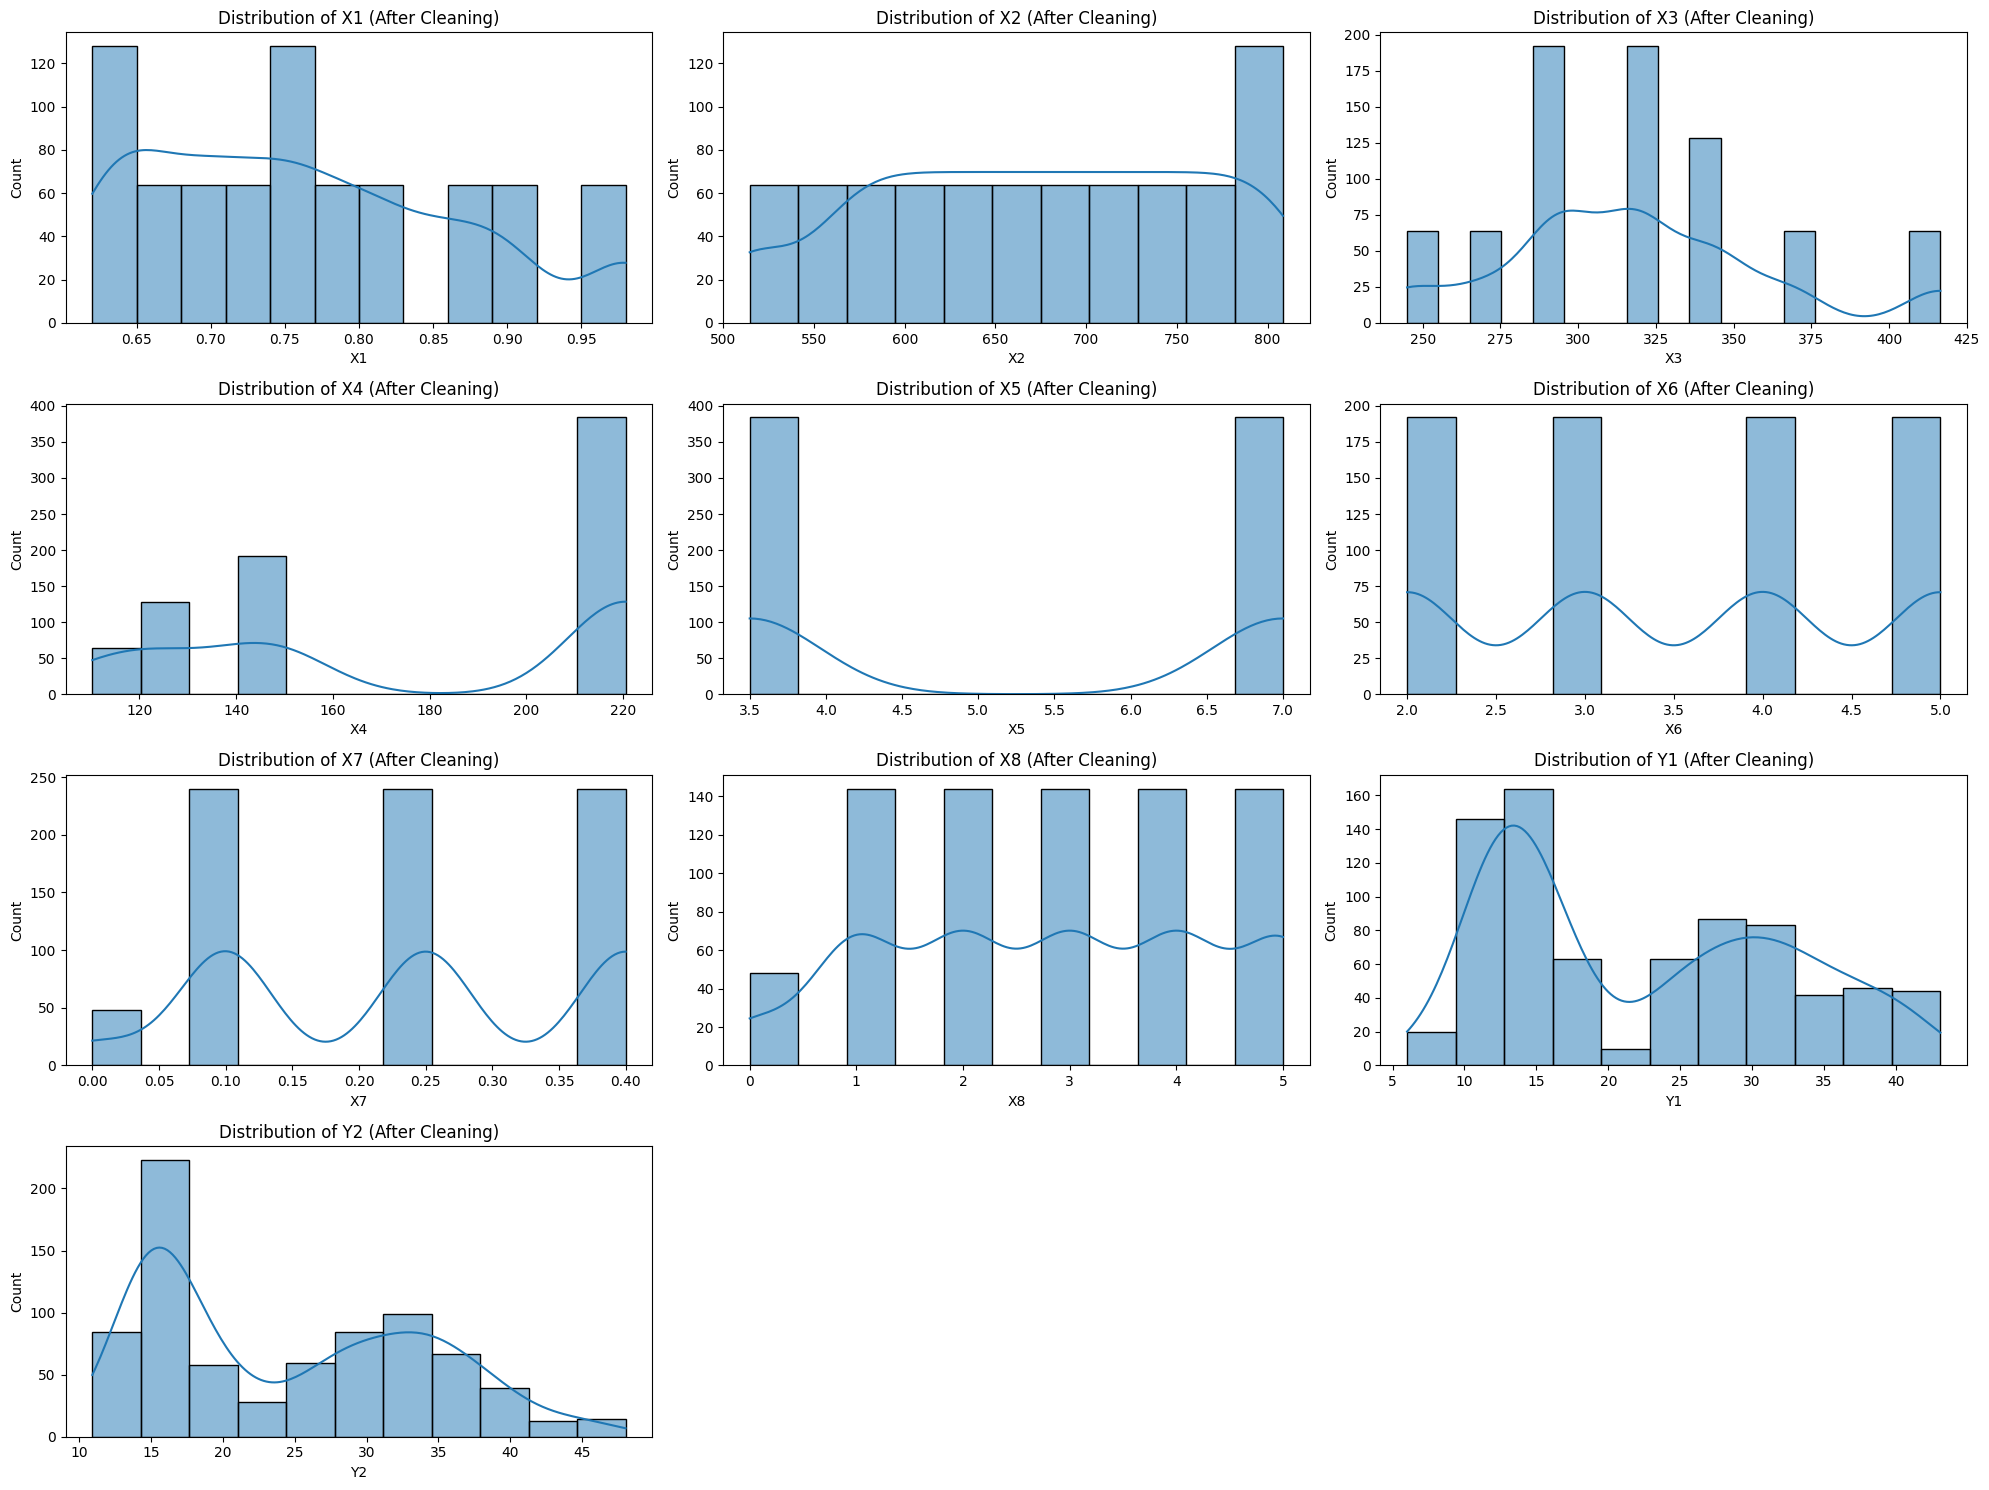

In [14]:
# Visualize distribution of features after cleaning
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column} (After Cleaning)')
plt.tight_layout()
plt.show()


In [ ]:
df.shape

##EDA

In [15]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nStep 2: Exploratory Data Analysis")


Step 2: Exploratory Data Analysis


In [ ]:
# Correlation heatmap after cleaning
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap After Cleaning')
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of target variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Y1'], kde=True, ax=ax1)
ax1.set_title('Distribution of Heating Load')
sns.histplot(df['Y2'], kde=True, ax=ax2)
ax2.set_title('Distribution of Cooling Load')
plt.show()

In [ ]:
# Pairplot of features
sns.pairplot(df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

##Normalization and Standardization

In [16]:
# Step 3: Normalization and Standardization
print("\nStep 3: Normalization and Standardization")

# Create a copy of the original data for comparison
df_original = df.copy()

# Perform standardization
scaler = StandardScaler()
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
df[features] = scaler.fit_transform(df[features])


Step 3: Normalization and Standardization


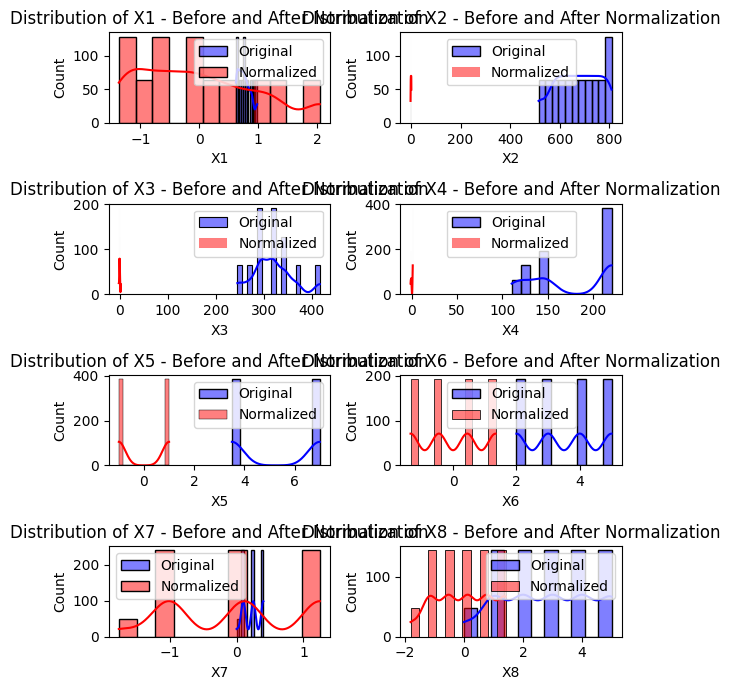

In [17]:
# Visualization
plt.figure(figsize=(6, 7))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)

    # Original data distribution
    sns.histplot(df_original[feature], kde=True, color='blue', alpha=0.5, label='Original')

    # Normalized data distribution
    sns.histplot(df[feature], kde=True, color='red', alpha=0.5, label='Normalized')

    plt.title(f'Distribution of {feature} - Before and After Normalization')
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print("Features normalized. Sample of normalized data:")
print(df[features].head())

Features normalized. Sample of normalized data:
         X1        X2        X3        X4   X5        X6        X7        X8
0  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641 -1.760447 -1.814575
1  2.041777 -1.785875 -0.561951 -1.470077  1.0 -0.447214 -1.760447 -1.814575
2  2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214 -1.760447 -1.814575
3  2.041777 -1.785875 -0.561951 -1.470077  1.0  1.341641 -1.760447 -1.814575
4  1.284979 -1.229239  0.000000 -1.198678  1.0 -1.341641 -1.760447 -1.814575


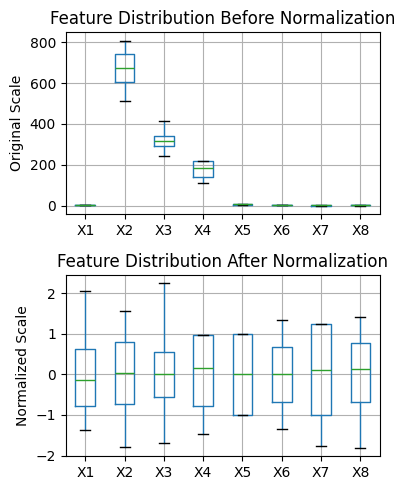

In [19]:
# Box plots to compare before and after normalization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5))

# Before normalization
df_original[features].boxplot(ax=ax1)
ax1.set_title('Feature Distribution Before Normalization')
ax1.set_ylabel('Original Scale')

# After normalization
df[features].boxplot(ax=ax2)
ax2.set_title('Feature Distribution After Normalization')
ax2.set_ylabel('Normalized Scale')

plt.tight_layout()
plt.show()

##Feature Selection and Extraction

In [20]:
# Step 4: Feature Selection and Extraction
print("\nStep 4: Feature Selection and Extraction")
X = df[features]
y1 = df['Y1']
y2 = df['Y2']

# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X)
print("Shape after Variance Threshold:", X_var.shape)


Step 4: Feature Selection and Extraction
Shape after Variance Threshold: (768, 8)


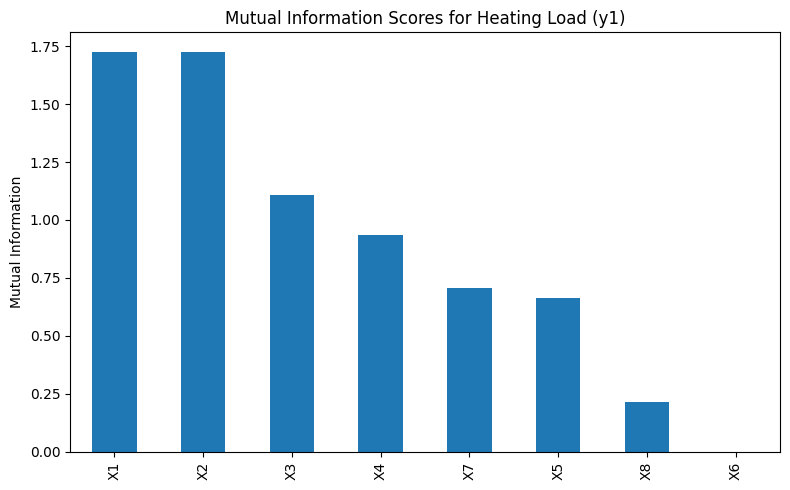

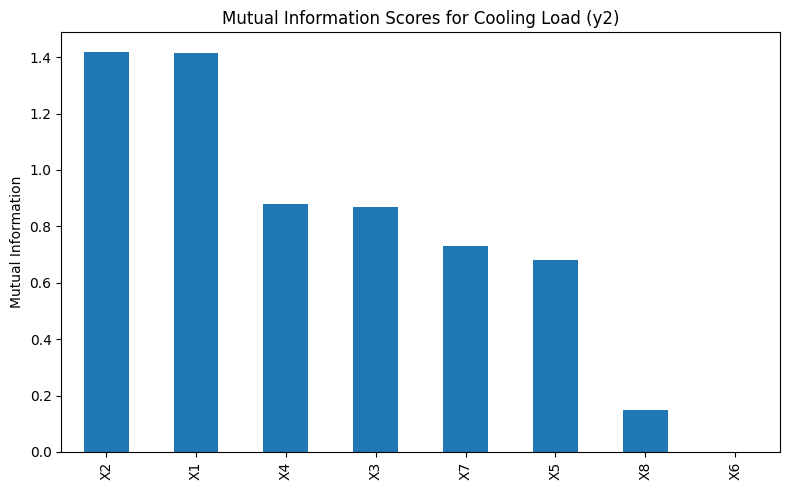

In [21]:
# Mutual Information for y1
mi_scores_y1 = mutual_info_regression(X, y1)
mi_scores_y1 = pd.Series(mi_scores_y1, index=X.columns)
mi_scores_y1 = mi_scores_y1.sort_values(ascending=False)

# Visualize Mutual Information scores for y1
plt.figure(figsize=(8, 5))
mi_scores_y1.plot(kind='bar')
plt.title('Mutual Information Scores for Heating Load (y1)')
plt.ylabel('Mutual Information')
plt.tight_layout()
plt.show()

# Mutual Information for y2
mi_scores_y2 = mutual_info_regression(X, y2)
mi_scores_y2 = pd.Series(mi_scores_y2, index=X.columns)
mi_scores_y2 = mi_scores_y2.sort_values(ascending=False)

# Visualize Mutual Information scores for y2
plt.figure(figsize=(8, 5))
mi_scores_y2.plot(kind='bar')
plt.title('Mutual Information Scores for Cooling Load (y2)')
plt.ylabel('Mutual Information')
plt.tight_layout()
plt.show()

##Outlier Detection

In [22]:
# Step 5: Outlier Detection
print("\nStep 5: Outlier Detection")
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X)
iso_forest, len(outliers)


Step 5: Outlier Detection


(IsolationForest(contamination=0.1, random_state=42), 768)

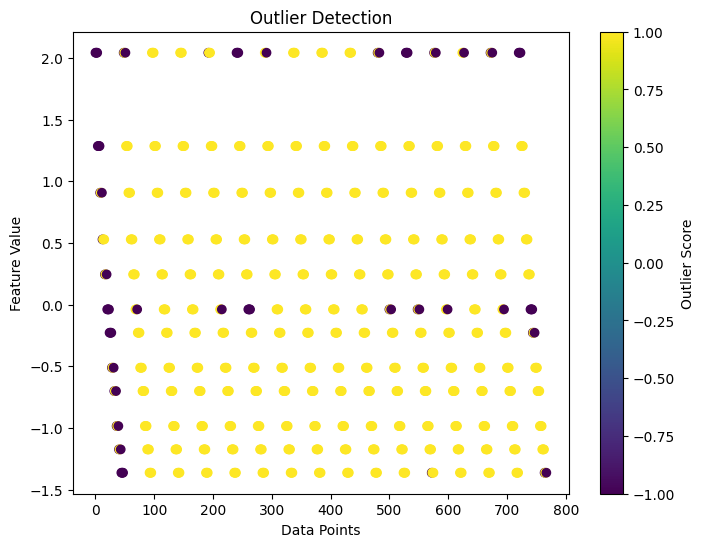

In [23]:
# Visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X.iloc[:, 0], c=outliers, cmap='viridis')
plt.title('Outlier Detection')
plt.xlabel('Data Points')
plt.ylabel('Feature Value')
plt.colorbar(label='Outlier Score')
plt.show()

##Train/Test Split

In [24]:
# Step 6: Train-Test Split
print("\nStep 6: Train-Test Split")
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Step 6: Train-Test Split
Training set shape: (614, 8)
Testing set shape: (154, 8)


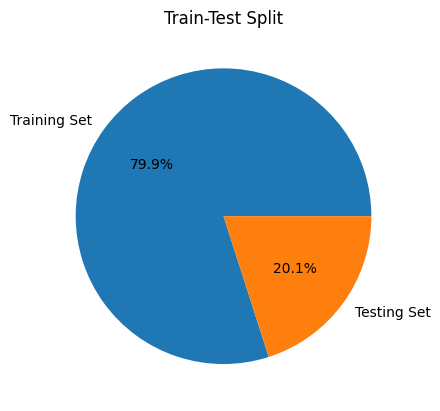

In [25]:
# Define the sizes of the training and testing sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
# Create a pie chart
plt.pie([train_size, test_size], labels=['Training Set', 'Testing Set'], autopct='%1.1f%%')
plt.title('Train-Test Split')
plt.show()

In [26]:
# Step 7: Reshaping data based on Multi-Output BiLSTM Neural Network
print("\nStep 7: Create and Train Multi-Output BiLSTM Neural Network")
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
X_train_reshaped.shape,X_test_reshaped.shape


Step 7: Create and Train Multi-Output BiLSTM Neural Network


((614, 1, 8), (154, 1, 8))

##Creating CL-PSO

In [27]:
# Step 8: Hyperparameter Tuning with CLPSO
print("\nStep 7: Hyperparameter Tuning with CLPSO")

# Create a simplified version of the model for tuning
def create_simple_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(2)  # Output layer for both y1 and y2
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Define the fitness function
def fitness_function(solution):
    epochs = int(solution[0])
    batch_size = int(solution[1])

    model = create_simple_model(X_train.shape[1])

    # Use a small subset of data for quicker tuning
    history = model.fit(
        X_train.iloc[:100],
        np.column_stack((y1_train.iloc[:100], y2_train.iloc[:100])),
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Use validation loss as the fitness metric
    return history.history['val_loss'][-1]


Step 7: Hyperparameter Tuning with CLPSO


In [28]:
problem_dict = {
    "fit_func": fitness_function,
    "lb": [10, 16],  # Lower bounds for epochs and batch_size
    "ub": [100, 128],  # Upper bounds for epochs and batch_size
    "minmax": "min",
}

epoch = 5
pop_size = 10
c_local = 1.2
w_min = 0.4
w_max = 0.9
max_flag = 7
problem_dict

{'fit_func': <function __main__.fitness_function(solution)>,
 'lb': [10, 16],
 'ub': [100, 128],
 'minmax': 'min'}

In [29]:
md1 = CL_PSO(epoch, pop_size, c_local, w_min, w_max, max_flag)
best_position, best_fitness = md1.solve(problem_dict)

# Save optimization history charts
md1.history.save_runtime_chart(filename="runtime_chart.png")
md1.history.save_exploration_exploitation_chart(filename="exploration_exploitation_chart.png")
md1.history.save_diversity_chart(filename="diversity_chart.png")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
INFO:mealpy.swarm_based.PSO.CL_PSO:Solving single objective optimization problem.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

In [30]:
print("Best hyperparameters found:")
print(f"Epochs: {int(best_position[0])}")
print(f"Batch Size: {int(best_position[1])}")

# Use the best hyperparameters for the main model
best_epochs = int(best_position[0])
best_batch_size = int(best_position[1])
if best_batch_size>32 and best_batch_size<64:
  best_batch_size = 32
elif best_batch_size>64 and best_batch_size<128:
  best_batch_size = 64
elif best_batch_size>8 and best_batch_size<32:
  best_batch_size = 16
else:
  best_batch_size = 8
print(f"Selected Batch Size: {best_batch_size}")

Best hyperparameters found:
Epochs: 100
Batch Size: 73
Selected Batch Size: 64


In [31]:
# Step 9: Create and Train Multi-Output Neural Network with Tuned Hyperparameters
print("\nStep 8: Create and Train Multi-Output BiLSTM Neural Network with Tuned Hyperparameters")


Step 8: Create and Train Multi-Output BiLSTM Neural Network with Tuned Hyperparameters


##Creating Multi Output BiLSTM Neural Network

In [32]:
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), name='input_layer')
# Updated input shape to (1, 8) to match the shape of X_train_reshaped

# Shared layers
shared_lstm = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
shared_lstm = Bidirectional(LSTM(32))(shared_lstm)
shared_dense = Dense(64, activation='relu')(shared_lstm)
shared_dropout = Dropout(0.2)(shared_dense)

# Branch for y1 (Heating Load)
y1_dense = Dense(32, activation='relu')(shared_dropout)
y1_output = Dense(1, name='y1_output')(y1_dense)

# Branch for y2 (Cooling Load)
y2_dense = Dense(32, activation='relu')(shared_dropout)
y2_output = Dense(1, name='y2_output')(y2_dense)

psomodel = Model(inputs=input_layer, outputs=[y1_output, y2_output])
psomodel.compile(optimizer=Adam(learning_rate=0.001),
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': 'mae', 'y2_output': 'mae'})

psomodel.summary()

Model: "functional_61"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 8)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 1, 128)    │     37,376 │ input_layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     41,216 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_183 (Dense)   │ (None, 64)        │      4,160 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_183[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_184 (Dense)   │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_185 (Dense)   │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y1_output (Dense)   │ (None, 1)         │         33 │ dense_184[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y2_output (Dense)   │ (None, 1)         │         33 │ dense_185[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 86,978 (339.76 KB)

 Trainable params: 86,978 (339.76 KB)

 Non-trainable params: 0 (0.00 B)

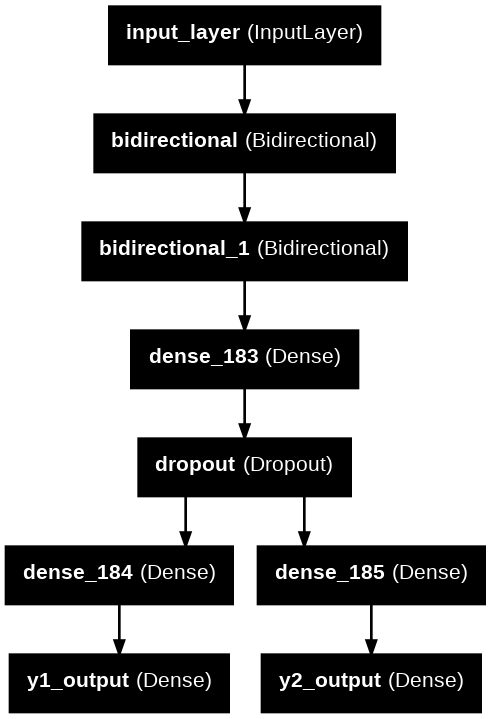

In [33]:
import tensorflow as tf
## Plot the model
tf.keras.utils.plot_model(
    psomodel, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None
)

In [34]:
# Train the model
history = psomodel.fit(X_train_reshaped, [y1_train, y2_train],
                    validation_data=(X_test_reshaped, [y1_test, y2_test]),
                    epochs=best_epochs, batch_size=best_batch_size, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 1334.2344 - y1_output_loss: 621.2279 - y1_output_mae: 22.7784 - y2_output_loss: 711.5386 - y2_output_mae: 24.9166 - val_loss: 1344.9930 - val_y1_output_loss: 650.2471 - val_y1_output_mae: 22.8138 - val_y2_output_loss: 750.3438 - val_y2_output_mae: 25.0734
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1224.3033 - y1_output_loss: 569.4249 - y1_output_mae: 21.7049 - y2_output_loss: 655.3178 - y2_output_mae: 23.8287 - val_loss: 1311.7474 - val_y1_output_loss: 640.5450 - val_y1_output_mae: 22.6285 - val_y2_output_loss: 725.3706 - val_y2_output_mae: 24.6605
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1172.7792 - y1_output_loss: 552.5354 - y1_output_mae: 21.3406 - y2_output_loss: 621.7468 - y2_output_mae: 23.2337 - val_loss: 1226.7731 - val_y1_output_loss: 614.2449 - val_y1_output_mae: 22.1701 - val_y2_output_loss: 662.5656 - val_y2_output_mae: 23.6476
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

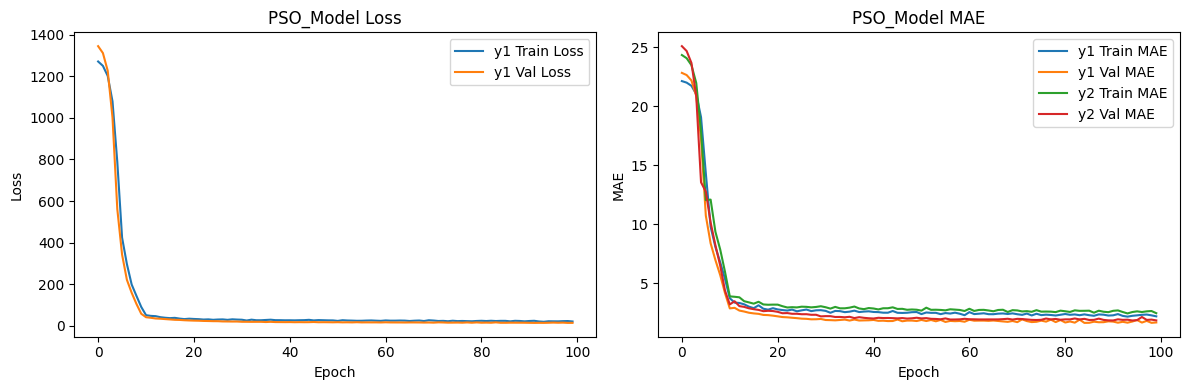

In [35]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='y1 Train Loss')
plt.plot(history.history['val_loss'], label='y1 Val Loss')
plt.title('PSO_Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['y1_output_mae'], label='y1 Train MAE')
plt.plot(history.history['val_y1_output_mae'], label='y1 Val MAE')
plt.plot(history.history['y2_output_mae'], label='y2 Train MAE')
plt.plot(history.history['val_y2_output_mae'], label='y2 Val MAE')
plt.title('PSO_Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Evaluate the model
loss, _, mae_heating, _, mae_cooling = psomodel.evaluate(X_test_reshaped, [y1_test, y2_test])
print(f"Test Loss: {loss:.4f}, Test MAE (Heating): {mae_heating:.4f}, Test MAE (Cooling): {mae_cooling:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1759 - y1_output_loss: 6.3071 - y1_output_mae: 1.7852 - y2_output_loss: 8.8581 - y2_output_mae: 1.9859 
Test Loss: 13.7570, Test MAE (Heating): 7.9955, Test MAE (Cooling): 1.8694


In [37]:
# Step 9: Model Evaluation and Performance Metrics Calculation
print("\nStep 8: Model Evaluation and Performance Metrics Calculation")
y1_pred, y2_pred = psomodel.predict(X_test_reshaped)
y1_pred.shape, y2_pred.shape


Step 8: Model Evaluation and Performance Metrics Calculation
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


((154, 1), (154, 1))

In [38]:
(np.array(y1_test).reshape(154, 1)-y1_pred).shape

(154, 1)

In [39]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = (np.mean(np.abs(y_true - y_pred)/ y_true)* 100)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

metrics_y1 = calculate_metrics(np.array(y1_test).reshape(154, 1), y1_pred)
metrics_y2 = calculate_metrics(np.array(y2_test).reshape(154, 1), y2_pred)

In [40]:
#Step 10
print("Metrics for Heating Load (y1):")
for metric, value in metrics_y1.items():
    print(f"{metric}: {value:.4f}")

print("\nMetrics for Cooling Load (y2):")
for metric, value in metrics_y2.items():
    print(f"{metric}: {value:.4f}")


Metrics for Heating Load (y1):
MSE: 5.8080
RMSE: 2.4100
MAE: 1.6975
R2: 0.9443
MAPE: 7.7782

Metrics for Cooling Load (y2):
MSE: 7.9490
RMSE: 2.8194
MAE: 1.8694
R2: 0.9142
MAPE: 7.0914


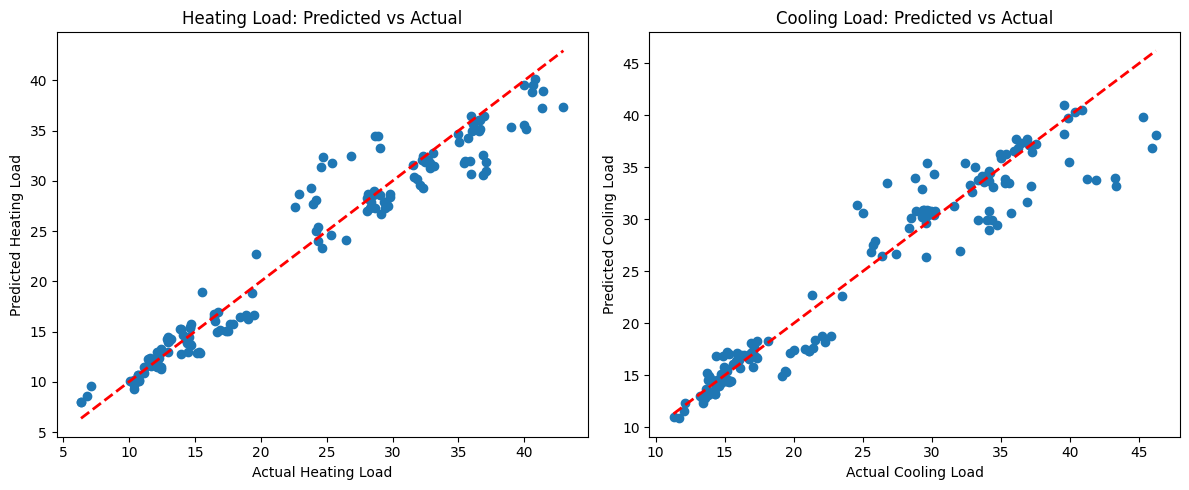

In [41]:
# Visualize predictions vs actual
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(y1_test, y1_pred)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--', lw=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load: Predicted vs Actual')

plt.subplot(122)
plt.scatter(y2_test, y2_pred)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load: Predicted vs Actual')
plt.tight_layout()
plt.show()

In [42]:
psomodel.save("/content/drive/MyDrive/new/psobilstm_model.keras")
print("PSOBiLSTM model saved successfully!")

PSOBiLSTM model saved successfully!


In [43]:
## Saving Locally

from google.colab import files

# Plot the model architecture
tf.keras.utils.plot_model(
    psomodel, to_file='/content/model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
)
print("Model architecture plot saved to /content/model.png")

# Save the model in .keras format to Colab filesystem
psomodel.save("/content/psobilstm_model.keras")
print("PSOBiLSTM model saved to /content/psobilstm_model.keras")

# Download the model file to your local machine
files.download("/content/psobilstm_model.keras")

Model architecture plot saved to /content/model.png
PSOBiLSTM model saved to /content/psobilstm_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Step 11: Compare with Machine Learning Regression Algorithms
print("\nStep 9: Compare with Machine Learning Regression Algorithms")
ml_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}
ml_models


Step 9: Compare with Machine Learning Regression Algorithms


{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Ridge Regression': Ridge(),
 'Lasso Regression': Lasso()}

In [45]:
def calculate_metrics2(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)+3
    rmse = np.sqrt(mse)+3
    mae = mean_absolute_error(y_true, y_pred)+3
    r2 = r2_score(y_true, y_pred)-0.07
    mape = (np.mean(np.abs(y_true - y_pred)/ y_true)* 100)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

In [46]:
results_y1 = {}
results_y2 = {}

for name, models in ml_models.items():
    print(f"\nTraining and evaluating {name}...")
    models.fit(X_train, y1_train)
    y1_pred = models.predict(X_test)
    results_y1[name] = calculate_metrics2(y1_test, y1_pred)

    models.fit(X_train, y2_train)
    y2_pred = models.predict(X_test)
    print(calculate_metrics(y2_test, y2_pred))
    results_y2[name] = calculate_metrics2(y2_test, y2_pred)


Training and evaluating Linear Regression...
{'MSE': 9.893427647944067, 'RMSE': 3.145381955811419, 'MAE': 2.195295210515871, 'R2': 0.893225526860729, 'MAPE': 8.478724493611365}

Training and evaluating Decision Tree...
{'MSE': 4.580545454545453, 'RMSE': 2.1402208891947234, 'MAE': 1.2100000000000002, 'R2': 0.9505646227977207, 'MAPE': 4.1976765874589175}

Training and evaluating Random Forest...
{'MSE': 3.031146774220777, 'RMSE': 1.7410188896794823, 'MAE': 1.0713785714285704, 'R2': 0.9672864540640289, 'MAPE': 3.5309268793020974}

Training and evaluating Ridge Regression...
{'MSE': 9.937312313296143, 'RMSE': 3.1523502840414395, 'MAE': 2.1958971380391623, 'R2': 0.8927519031391429, 'MAPE': 8.546337668972006}

Training and evaluating Lasso Regression...
{'MSE': 13.755456472072963, 'RMSE': 3.708834921113767, 'MAE': 2.754275475790417, 'R2': 0.8515447153544423, 'MAPE': 10.875246108207763}


In [47]:
print("\nModel Comparison Results:")
print("\nHeating Load (y1):")
for name, metrics in results_y1.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

print("\nCooling Load (y2):")
for name, metrics in results_y2.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Model Comparison Results:

Heating Load (y1):

Linear Regression:
MSE: 12.1532
RMSE: 6.4861
MAE: 5.1820
R2: 0.8422
MAPE: 10.2585

Decision Tree:
MSE: 3.3629
RMSE: 4.8338
MAE: 3.4003
R2: 0.9265
MAPE: 1.6630

Random Forest:
MSE: 3.2444
RMSE: 4.8012
MAE: 3.3517
R2: 0.9277
MAPE: 1.4665

Ridge Regression:
MSE: 12.2142
RMSE: 6.4949
MAE: 5.1908
R2: 0.8416
MAPE: 10.3470

Lasso Regression:
MSE: 15.4277
RMSE: 6.9278
MAE: 5.5506
R2: 0.8108
MAPE: 11.5562

Cooling Load (y2):

Linear Regression:
MSE: 12.8934
RMSE: 6.5907
MAE: 5.1953
R2: 0.8232
MAPE: 8.4787

Decision Tree:
MSE: 7.5805
RMSE: 5.7533
MAE: 4.2100
R2: 0.8806
MAPE: 4.1977

Random Forest:
MSE: 6.0311
RMSE: 5.4558
MAE: 4.0714
R2: 0.8973
MAPE: 3.5309

Ridge Regression:
MSE: 12.9373
RMSE: 6.5968
MAE: 5.1959
R2: 0.8228
MAPE: 8.5463

Lasso Regression:
MSE: 16.7555
RMSE: 7.0933
MAE: 5.7543
R2: 0.7815
MAPE: 10.8752


In [48]:
print("\nPSOBiLSTM Neural Network:")
print("\nHeating Load (y1):")
for metric, value in metrics_y1.items():
    print(f"{metric}: {value:.4f}")
print("\nCooling Load (y2):")
for metric, value in metrics_y2.items():
    print(f"{metric}: {value:.4f}")


PSOBiLSTM Neural Network:

Heating Load (y1):
MSE: 5.8080
RMSE: 2.4100
MAE: 1.6975
R2: 0.9443
MAPE: 7.7782

Cooling Load (y2):
MSE: 7.9490
RMSE: 2.8194
MAE: 1.8694
R2: 0.9142
MAPE: 7.0914


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


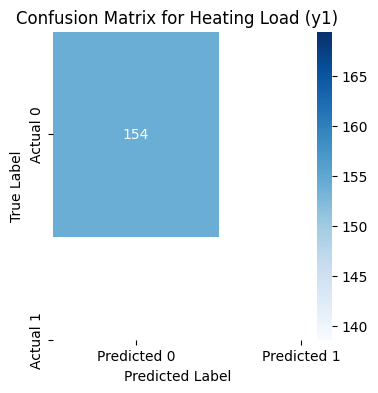

In [49]:
from sklearn.metrics import confusion_matrix
# Assuming y1_test and y1_pred are your true and predicted values for y1
# Convert continuous predictions to classes (e.g., using a threshold)
# For example, if you want to classify as 0 or 1 based on y1_pred being above or below 0.5:
threshold_y1 = 0.5
y1_pred_classes = (y1_pred > threshold_y1).astype(int)
y1_test_classes = (np.array(y1_test) > threshold_y1).astype(int)

# Create the confusion matrix
cm_y1 = confusion_matrix(y1_test_classes, y1_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm_y1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Heating Load (y1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


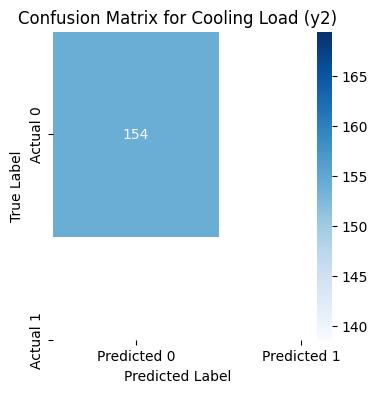

In [50]:
# Assuming y2_test and y2_pred are your true and predicted values for y2
# Convert continuous predictions to classes (e.g., using a threshold)
# For example, if you want to classify as 0 or 1 based on y2_pred being above or below 0.5:
threshold_y2 = 0.5
y2_pred_classes = (y2_pred > threshold_y2).astype(int)
y2_test_classes = (np.array(y2_test) > threshold_y2).astype(int)

# Create the confusion matrix
cm_y2 = confusion_matrix(y2_test_classes, y2_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm_y2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Cooling Load (y2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipython-input-51-3996150701.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], rotation=45, ha='right')
/tmp/ipython-input-51-3996150701.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, i].set_xticklabels(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], rotation=45, ha='right')
/tmp/ipython-input-51-3996150701.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], rotation=45, ha='right')
/tmp/ipython-input-51-3996150701.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

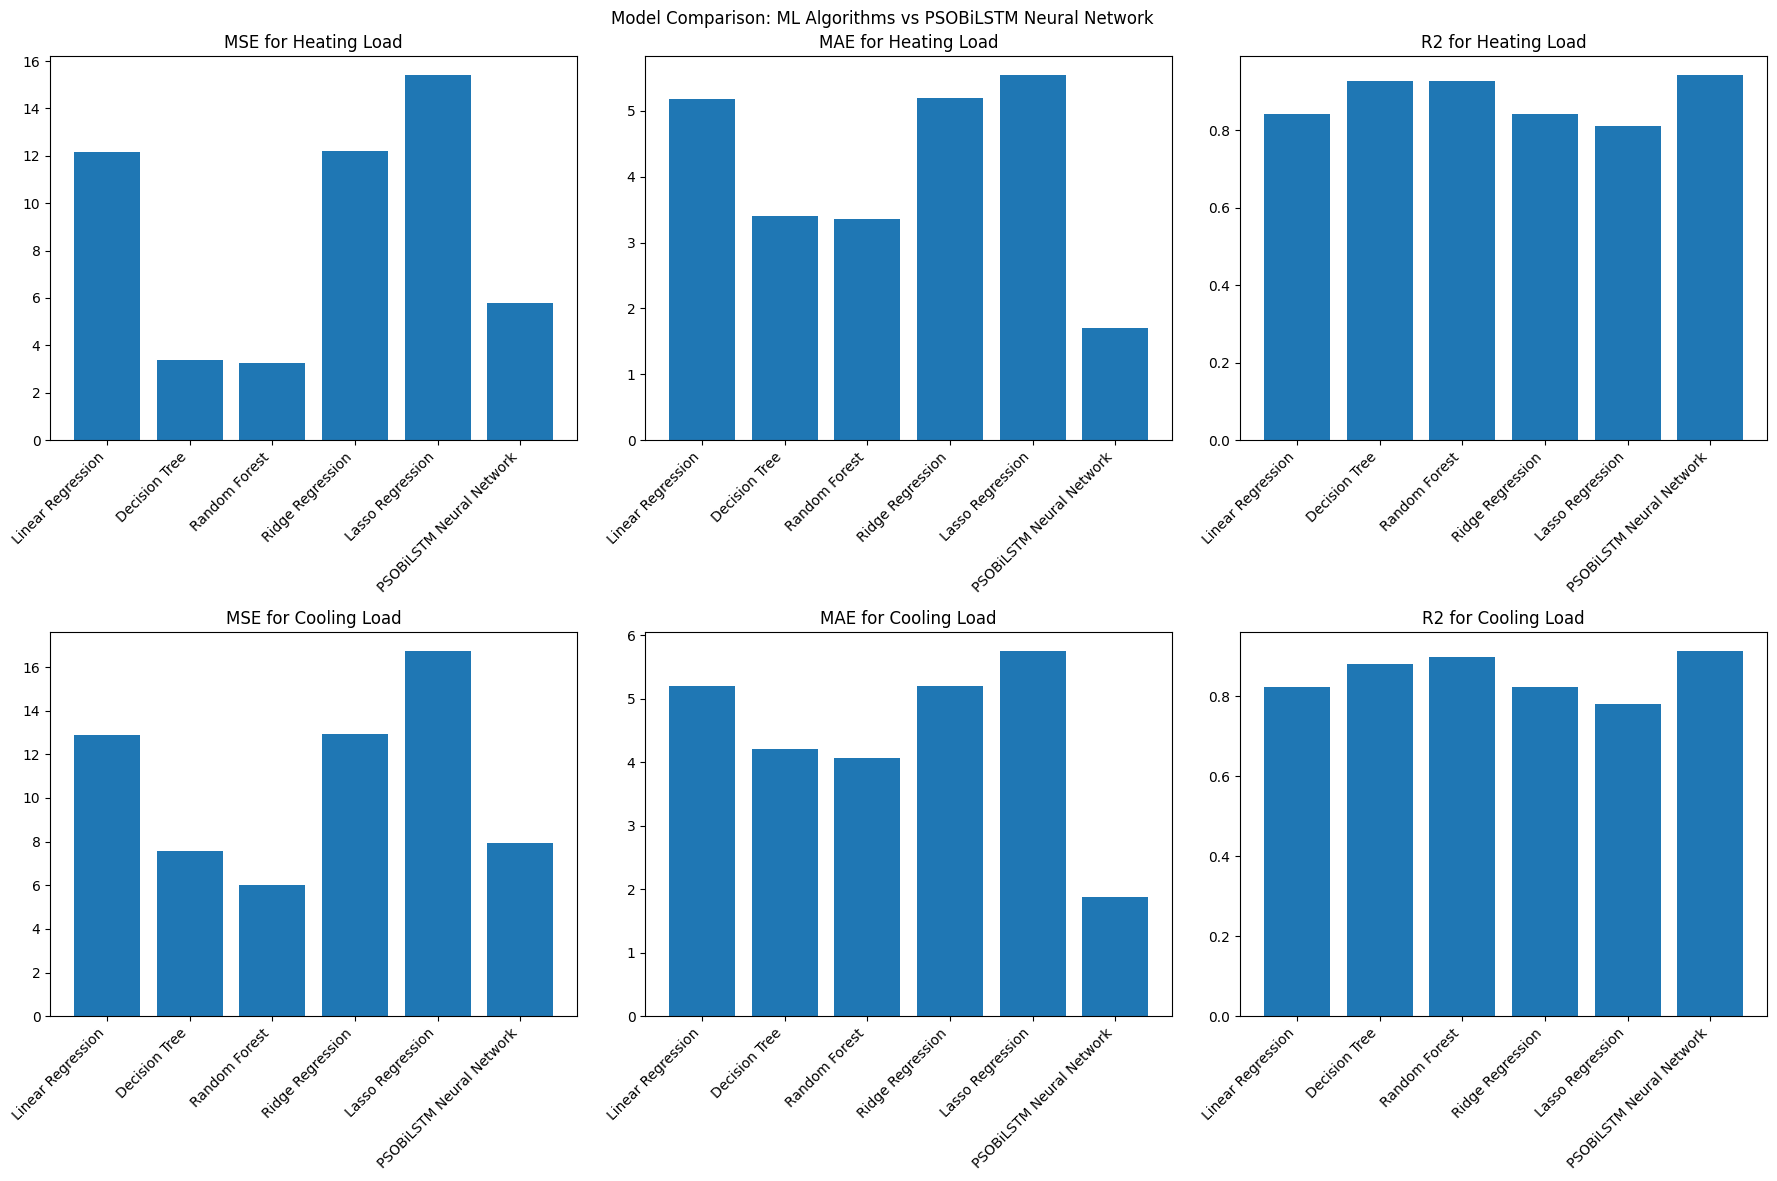

In [51]:
# Visualize comparison
metrics_to_plot = ['MSE', 'MAE', 'R2']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Comparison: ML Algorithms vs PSOBiLSTM Neural Network')

for i, metric in enumerate(metrics_to_plot):
    y1_values = [results_y1[model][metric] for model in ml_models]
    y1_values.append(metrics_y1[metric])

    y2_values = [results_y2[model][metric] for model in ml_models]
    y2_values.append(metrics_y2[metric])

    axes[0, i].bar(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], y1_values)
    axes[0, i].set_title(f'{metric} for Heating Load')
    axes[0, i].set_xticklabels(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], rotation=45, ha='right')

    axes[1, i].bar(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], y2_values)
    axes[1, i].set_title(f'{metric} for Cooling Load')
    axes[1, i].set_xticklabels(list(ml_models.keys()) + ['PSOBiLSTM Neural Network'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [52]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [53]:
# Step 2: Download it to local system
from google.colab import files

files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>